#### NOTE: This course work is to use the K-Nearest-Neighbor algorithm to classify text documents

## K-Nearest-Neighbor (KNN) classification on Newsgroups 

In [1]:
#read in the necessary libraries
import math
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

### Exploratory Analysis

In [2]:
cd ~/desktop/jpt_demo

/Users/Alexkilledme/Desktop/jpt_demo


In [3]:
#load data
train=pd.read_table('~/desktop/data/trainMatrixModified.txt', header= None) 
train_lab=pd.read_table('~/desktop/data/trainClasses.txt', header=None)[1]
test=pd.read_table('~/desktop/data/testMatrixModified.txt', header=None)
test_lab=pd.read_table('~/desktop/data/testClasses.txt', header=None)[1]
terms = pd.read_table('~/desktop/data/modifiedterms.txt', header=None)

In [4]:
#converting from TD to DT matrix
DT_train = train.T
DT_test = test.T

In [5]:
#shape of DT_train data
DT_train.shape
numTerms=DT_train.shape[1]
NDocs = DT_train.shape[0]
print numTerms,NDocs

5500 800


In [6]:
terms = np.genfromtxt("/Users/Alexkilledme/Desktop/data/modifiedterms.txt", dtype=str)
terms[0:30]

tFreq = DT_train.sum(axis=1)

dictTF = {}
for i in range(len(tFreq)):
    dictTF[terms[i]] = tFreq[i]
print sorted(dictTF.items())
sorteddictTF = sorted(dictTF.values(), reverse=True)

[('00', 159.0), ('10', 254.0), ('1010', 105.0), ('125', 74.0), ('14', 100.0), ('1990', 73.0), ('1991', 159.0), ('1992', 23.0), ('1993', 80.0), ('1st', 67.0), ('20', 32.0), ('21', 61.0), ('25', 136.0), ('2nd', 24.0), ('30', 59.0), ('4324219', 24.0), ('50', 78.0), ('5000', 286.0), ('63', 44.0), ('635', 42.0), ('705', 78.0), ('89', 204.0), ('919', 113.0), ('999', 32.0), ('abc', 172.0), ('abl', 73.0), ('accept', 195.0), ('access', 53.0), ('act', 168.0), ('activ', 107.0), ('actual', 485.0), ('adam', 81.0), ('add', 205.0), ('addit', 53.0), ('address', 31.0), ('admit', 81.0), ('admittedli', 202.0), ('advanc', 125.0), ('advantag', 45.0), ('advic', 75.0), ('afternoon', 102.0), ('ago', 78.0), ('allstar', 47.0), ('altern', 2.0), ('amount', 330.0), ('analyst', 51.0), ('anderson', 99.0), ('andrewcmuedu', 28.0), ('angel', 253.0), ('angelo', 72.0), ('announc', 48.0), ('anonym', 28.0), ('anybodi', 89.0), ('anymor', 89.0), ('anywai', 792.0), ('app', 50.0), ('appear', 214.0), ('appropri', 74.0), ('archi

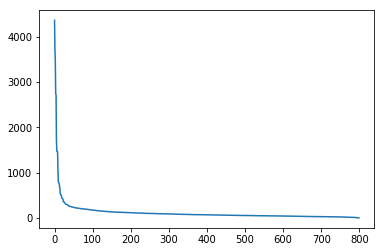

In [7]:
#plot dict
plt.plot(sorteddictTF)
plt.show()

### a. Create your own KNN classifier function. 

In [8]:
#preparation: transform data to matrix
DT_train = np.array(DT_train)
DT_test = np.array(DT_test)
train_lab = np.array(train_lab)
test_lab = np.array(test_lab)

In [9]:
def knn_function(inX, dataset,dataset_lab, K, measure):
    """ find K nearest neighbours of data among D """
    #Euclidean Distance
    if measure == 0:
#        diffMat = np.tile(inX, (D.shape[0],1)) - D
#        sqDiffMat = diffMat**2
#        sqDistances = sqDiffMat.sum(axis=1)
#        distances = sqDistances**0.5
       distances = np.sqrt(((dataset - inX)**2).sum(axis=1))
    #Cosine Similarity distance
    elif measure == 1:
        D_norm = np.array([np.linalg.norm(dataset[i]) for i in range(len(dataset))])
        x_norm = np.linalg.norm(inX)
        sims = np.dot(dataset,inX)/(D_norm * x_norm)
        distances = 1 - sims
        
    sortedDistIndicies = np.argsort(distances) # the indices of the training instances in increasing order of distance to inX
    # return the indexes of K nearest neighbours
    neighbor_lab = dataset_lab[sortedDistIndicies[:K]]
    class0 = 0
    class1 = 0
    for index in neighbor_lab:
        #print(L[index])
        if dataset_lab[index] == 0:
            class0 = class0 + 1
        else:
            class1 = class1 + 1
        if class0 > class1:
            predicted_class = 0
        else:
            predicted_class = 1
        # indices of K nearest neighbors
    index_k_nearest = sortedDistIndicies[:K]
    return index_k_nearest, predicted_class

In [10]:
# knn_function test of measure 1
top_K_neighbors, predicted_class = knn_function(DT_test[3], DT_train, train_lab, 4, 1)
print ("The indices of K Nearest Neighbours are: {} \nThe predicted class is: {}".format(top_K_neighbors, predicted_class))

The indices of K Nearest Neighbours are: [459 636 590 206] 
The predicted class is: 1


In [11]:
# knn_function test of measure 0
top_K_neighbors, predicted_class = knn_function(DT_test[3], DT_train, train_lab, 4, 0)
print ("The indices of K Nearest Neighbours are: {} \nThe predicted class is: {}".format(top_K_neighbors, predicted_class))

The indices of K Nearest Neighbours are: [459 636 590 744] 
The predicted class is: 1


### b.Create a function to compute the classification accuracy (ratio of correct predictions to the number of test instances)

In [12]:
def knn_accuracy(test, test_lab, train, train_lab, K, measure):
    T=0
    F=0
    for i in range(len(test)):
        actual=test_lab[i]
        top_K_neighbors, predicted = knn_function(test[i], train, train_lab ,K, measure)
        if actual == predicted:
            T += 1       
        else:
            F += 1     
    acuuracy = float(T)/float(T+F) 
    return acuuracy

### c.Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. 

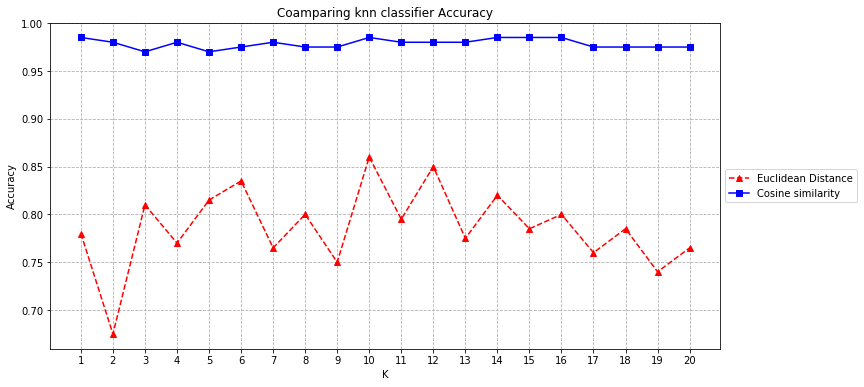

In [13]:
#Euclidean Distance (K from 1 to 20)
Euc=[]
for K in range(20):
    Euc.append(knn_accuracy(DT_test, test_lab, DT_train, train_lab ,K+1, 0))
#Cosine similarity Measure (K from 1 to 20)
Cos=[]
for K in range(20):
    Cos.append(knn_accuracy(DT_test, test_lab, DT_train, train_lab ,K+1, 1))
    
K=list(range(1,21))
plt.figure(figsize=(12,6))
plt.plot(K, Euc, 'r^--', label='Euclidean Distance')
plt.plot(K, Cos, 'bs-', label='Cosine similarity')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Coamparing knn classifier Accuracy')
plt.grid(linestyle='--')
plt.xticks(K)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### d.modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies).

In [14]:
#load data
train=pd.read_table('~/desktop/data/trainMatrixModified.txt', header= None) 
train_lab=pd.read_table('~/desktop/data/trainClasses.txt', header=None)[1]
test=pd.read_table('~/desktop/data/testMatrixModified.txt', header=None)
test_lab=pd.read_table('~/desktop/data/testClasses.txt', header=None)[1]
DT_train = train.T
DT_test = test.T

In [15]:
numTerms=DT_train.shape[0]
##Training
# Find doucment frequencies for each term
DF_train = np.array([(DT_train!=0).sum(0)]) # could also say DF = np.array([(DT!=0).sum(0)])
# Create a matrix with all entries = NDocs
NDocs_train = DT_train.shape[1]
NMatrix_train=np.ones(np.shape(DT_train), dtype=float)*NDocs_train
#calulate IDF
IDF_train = np.log2(np.divide(NMatrix_train, DF_train))
#compute the TFxIDF values for each document-term entry
train_tfidf = DT_train * IDF_train

In [16]:
##Testing
test_tfidf=DT_test*IDF_train[0:200,:]
test_tfidf.shape
print train_tfidf.shape
print test_tfidf.shape

(800, 5500)
(200, 5500)


In [17]:
print test_tfidf.shape
print test_lab.shape
print train_tfidf.shape
print train_lab.shape

(200, 5500)
(200,)
(800, 5500)
(800,)


In [18]:
train_tfidf = np.array(train_tfidf)
test_tfidf = np.array(test_tfidf)

In [19]:
Euc_tfidf=[]
for K in range(20):
    Euc_tfidf.append(knn_accuracy(test_tfidf, test_lab, train_tfidf, train_lab ,K+1, 0))

Cos_tfidf=[]
for K in range(20):
    Cos_tfidf.append(knn_accuracy(test_tfidf, test_lab, train_tfidf, train_lab ,K+1, 1))

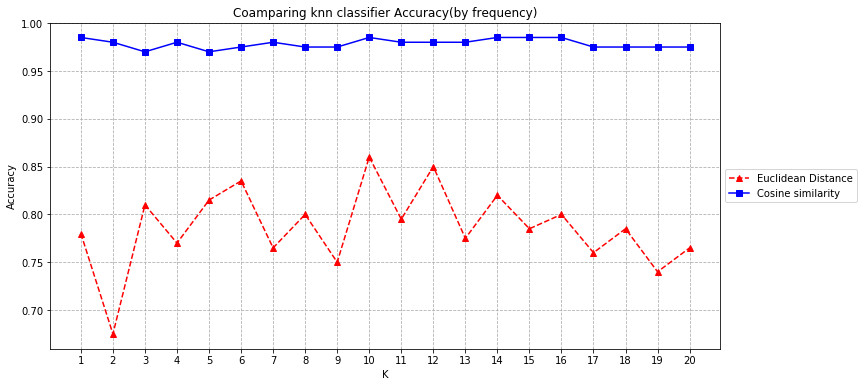

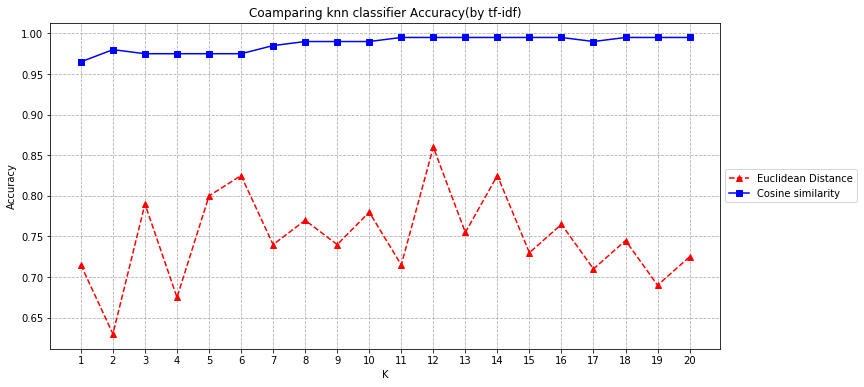

In [20]:
K=list(range(1,21))
plt.figure(figsize=(12,6))
plt.plot(K, Euc, 'r^--', label='Euclidean Distance')
plt.plot(K, Cos, 'bs-', label='Cosine similarity')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Coamparing knn classifier Accuracy(by frequency)')
plt.grid(linestyle='--')
plt.xticks(K)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

K=list(range(1,21))
plt.figure(figsize=(12,6))
plt.plot(K, Euc_tfidf, 'r^--', label='Euclidean Distance')
plt.plot(K, Cos_tfidf, 'bs-', label='Cosine similarity')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Coamparing knn classifier Accuracy(by tf-idf)')
plt.grid(linestyle='--')
plt.xticks(K)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

As we seen the above results, we could observe that the Cosine Similarity measure is generally more accurate than the Euclidean measure. By using the raw data frequency (top graph), the Cosine similarity measure perform a consistent ranging between about 0.97-0.99 accuracy as K values increase. When we look at the Cosine Measure on tf-idf graph, we could observe that the accuracy continues to improve as K values increasing. <br>
when we look at the Euclidean measure, By using the raw data frequency (top graph),  the Euclidean measure perform a fluctuation ranging between about 0.72-0.86 accuracy as K values increase. The accuracy appoach of Euclidean measure by using tf-idf is very similar to by using raw frequency data, but the accuracy peak appears at k=12 instead of k=10 which is in the graph using raw frequency data. The lowest accuracy of tf-idf is about 63% which is even worse than the accuracy 67% by using the raw frequency data. <br>
For the overall performance of the above two models, the accuracy of Cosine similarity measure is better than that of Euclidean Measure.

### e.Create a classifier based on the Rocchio Method adapted for text categorization.

In [21]:
DT_train = np.array(train.T)
DT_test = np.array(test.T)

In [22]:
#Function of training part
def Rocchio_Train(train_TFIDF,label):
    #D: <train_TFIDF,label>
    D= np.column_stack((train_TFIDF, label))
    
    # seperate by class(label) and drop the class
    C0 = D[D[:, -1]==0][:,:-1]
    C1 = D[D[:, -1]==1][:,:-1]
    
    #prototype vector (Pi where i is label== categorical level and pi is sum of Document vactor in ci)
    p0 = C0.sum(axis=0)
    p1 = C1.sum(axis=0)
    
    return p0, p1

In [23]:
#Run the function
p0, p1= Rocchio_Train(train_tfidf,train_lab)

In [24]:
#Function of the classification part
def Rocchio_classifier(p0,p1,instance):
    similarity={}
    #cosine similarity
    p0_norm = np.linalg.norm(p0)
    p1_norm = np.linalg.norm(p1)
    instance_norm = np.linalg.norm(instance)
    sims_p0 = np.dot(p0,instance)/(p0_norm * instance_norm)
    sims_p1 = np.dot(p1,instance)/(p1_norm * instance_norm)
    
    #the similarity values of the instance to each of the category prototypes
    similarity[0]= sims_p0
    similarity[1]= sims_p1
    
    #the predicted class
    predit_cls = max(similarity, key = lambda k: similarity[k]) 
    
    return  predit_cls, similarity

In [25]:
#now, run the function with the input datas as an example
predit_cls, similarity = Rocchio_classifier(p0,p1,DT_test[10])
print predit_cls, similarity

0 {0: 0.37594770098367214, 1: 0.12690266957875396}


In [26]:
#the classification accuracy
def Rocchio_Accuracy_tester(test, testlabel, p0, p1):
    
    T=0
    F=0
    for i in range(len(test)):
        actual=testlabel[i]
        predit_cls= Rocchio_classifier(p0,p1,test[i])[0]
        
        if actual == predit_cls:
            T += 1
        
        else:
            F += 1
        
    acuuracy = float(T)/float(T+F) 
    
    return acuuracy

In [27]:
acuuracy = Rocchio_Accuracy_tester(DT_test, test_lab, p0, p1)
print "The accuracy rate is %.2f" % acuuracy

The accuracy rate is 0.98


Comparing the accuracy of the Rocchio method to the Knn method on the original data, we can see that the KNN algorithm with cosine similarity measure outputs has little better accuracies in general although its accuracy is not as stable as that of Rocchio accuracy